In [2]:
#作业一

In [ ]:
#第一部分：求各区域租房中位数

In [37]:
import pandas as pd

# 读取Excel文件，保留所有空白单元格（默认行为）
# 假设文件名为"数据.xlsx"，读取第一个工作表
df = pd.read_excel("HW3_Rent.xlsx", sheet_name=0)

# 显示数据（空白单元格会显示为NaN，但在后续处理中会保留位置）
print("原始数据（包含空白）：")
print(df)

# 可选：将NaN替换为更直观的空白字符串（便于查看）
df_filled = df.fillna("")
print("\n替换NaN为空白后的显示：")
print(df_filled)

# 按行遍历数据（包含空白位置）
print("\n逐行打印数据（保留空白位置）：")
for index, row in df.iterrows():
    # 每行数据会包含所有列，即使是空白单元格也会占据位置
    print(f"第{index+1}行：{row.tolist()}")

原始数据（包含空白）：
                              名称  价格（元/月） 出租方式  出租方式（整租-0，合租主卧-1，合租单间-2）  \
0        万源城御璄,230户型,高区景观楼层,豪华装修    33000   整租                         0   
1     近 科技绿洲 字节房补 一室户 拎包入住 12号线东     3100   整租                         0   
2     中庚漫游城 平阳四街坊精装修一房 12号线顾戴路拎包     3200   整租                         0   
3     近 科技绿洲 字节房补 一室拎包入住 12号线东兰路     3100   整租                         0   
4        近12号线,婚房首租,精装全配拎包入住,已空关     3200   整租                         0   
...                          ...      ...  ...                       ...   
4177  扩建到800平 带地暖8套房 包物业 家具全配 可看    34000   整租                         0   
4178   朗阅府 豪华装修 自住配置 中央空调地暖 拎包入住     7800   整租                         0   
4179  住进高迪 | 电梯精装现房,南向三面采光,错过再无,     8000   整租                         0   
4180  贝越流明新苑 3室2厅2卫 精装修129平米 诚意出     8500   整租                         0   
4181  2.21广兰站 中环内中芯国际學校旁带泳池网球场南北    12500   整租                         0   

        户型  整租室数  整租厅数  合租人数  面积（单位：㎡）   朝向  \
0     4室2厅   4.0   2.0   NaN

In [38]:
import pandas as pd

# 读取Excel数据
df = pd.read_excel("HW3_RENT.xlsx", sheet_name=0)

# 初始化各区域的列表（存储第2列和第9列数据）
gumei_Rent_price = []    # 古美区域的第2列数据
shibo_Rent_price = []    # 世博区域的第2列数据
xuhui_Rent_price = []    # 徐汇区域的第2列数据
zhangjiang_Rent_price = []  # 张江区域的第2列数据

gumei_Area = []          # 古美区域的第9列数据
shibo_Area = []          # 世博区域的第9列数据
xuhui_Area = []          # 徐汇区域的第9列数据
zhangjiang_Area = []     # 张江区域的第9列数据

# 遍历DataFrame的每一行
for index, row in df.iterrows():
    # 获取第14列的区域信息（注意：Python列索引从0开始，第14列对应索引13）
    region = row.iloc[13]
    
    # 获取第2列数据（索引1）和第9列数据（索引8）
    col2_data = row.iloc[1]  # 第2列数据
    col9_data = row.iloc[8]  # 第9列数据
    
    # 根据区域将数据添加到对应列表
    if region == "古美":
        gumei_Rent_price.append(col2_data)
        gumei_Area.append(col9_data)
    elif region == "世博":
        shibo_Rent_price.append(col2_data)
        shibo_Area.append(col9_data)
    elif region == "徐汇":
        xuhui_Rent_price.append(col2_data)
        xuhui_Area.append(col9_data)
    elif region == "张江":
        zhangjiang_Rent_price.append(col2_data)
        zhangjiang_Area.append(col9_data)
    # 如需处理其他区域，可添加更多elif条件

# 打印结果示例（验证数据拆分是否正确）
print("古美区域第2列数据数量：", len(gumei_Rent_price))
print("世博区域第9列数据数量：", len(shibo_Area))
print("徐汇区域第2列前5条数据：", xuhui_Rent_price[:5])
print("张江区域第9列前5条数据：", zhangjiang_Area[:5])


古美区域第2列数据数量： 582
世博区域第9列数据数量： 1200
徐汇区域第2列前5条数据： [13500, 14000, 14500, 20000, 3800]
张江区域第9列前5条数据： [30, 38, 40, 20, 25]


In [43]:
def divide_lists(list1, list2):
    """
    计算两个列表对应位置元素的除法
    
    参数:
        list1: 被除数列表
        list2: 除数列表
        
    返回:
        结果列表，每个元素为对应位置的商；
        若除数为0，对应位置返回None；
        若列表长度不匹配，返回None
    """
    # 检查两个列表长度是否一致
    if len(list1) != len(list2):
        print("错误：两个列表长度不匹配")
        return None
    
    result = []
    for a, b in zip(list1, list2):
        try:
            # 尝试进行除法运算
            result.append(a / b)
        except ZeroDivisionError:
            # 处理除数为0的情况
            result.append(None)
        except TypeError:
            # 处理非数字元素的情况
            result.append(None)
    
    return result

   
gumei_rent=divide_lists(gumei_Rent_price, gumei_Area)   
shibo_rent=divide_lists(shibo_Rent_price,shibo_Area)
xuhui_rent=divide_lists(xuhui_Rent_price, xuhui_Area)
zhangjiang_rent=divide_lists(zhangjiang_Rent_price, zhangjiang_Area)

print(gumei_rent)
print(shibo_rent)
print(xuhui_rent)
print(zhangjiang_rent)

[146.66666666666666, 67.3913043478261, 55.172413793103445, 75.60975609756098, 74.4186046511628, 73.14634146341463, 56.14035087719298, 60.0, 57.142857142857146, 79.48717948717949, 72.72727272727273, 62.5, 69.56521739130434, 78.04878048780488, 65.3061224489796, 65.11627906976744, 74.35897435897436, 79.48717948717949, 63.63636363636363, 68.08510638297872, 68.29268292682927, 70.4390243902439, 74.35897435897436, 59.57446808510638, 75.67567567567568, 67.3913043478261, 68.88888888888889, 66.66666666666667, 75.60975609756098, 65.95744680851064, 78.04878048780488, 70.45454545454545, 62.22222222222222, 71.7948717948718, 68.29268292682927, 77.5, 64.0, 78.04878048780488, 70.8955223880597, 100.87719298245614, 88.43537414965986, 71.73913043478261, 166.66666666666666, 82.79569892473118, 105.5045871559633, 115.67164179104478, 113.04347826086956, 158.27338129496403, 153.25670498084293, 81.89655172413794, 110.0, 147.72727272727272, 96.42857142857143, 85.71428571428571, 96.15384615384616, 111.11111111111

In [47]:
import numpy as np

def remove_outliers_from_list(data_list, method='iqr'):
    """
    从列表中去除异常值
    
    参数:
        data_list: 包含数值的列表（可能含None）
        method: 异常值检测方法，'iqr'或'std'
    
    返回:
        去除异常值后的新列表
    """
    # 过滤掉None值（空白），同时保留原始数值用于计算边界
    valid_data = [x for x in data_list if x is not None]
    
    if not valid_data:
        print("警告：列表中没有有效数据")
        return []
    
    # 转换为numpy数组便于计算
    valid_np = np.array(valid_data)
    
    # 计算上下限
    if method == 'iqr':
        # IQR方法
        q1 = np.percentile(valid_np, 25)
        q3 = np.percentile(valid_np, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        print(f"IQR方法：下限={lower_bound:.2f}, 上限={upper_bound:.2f}")
    elif method == 'std':
        # 标准差方法（3倍标准差）
        mean = np.mean(valid_np)
        std = np.std(valid_np)
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        print(f"标准差方法：均值={mean:.2f}, 标准差={std:.2f}, 下限={lower_bound:.2f}, 上限={upper_bound:.2f}")
    else:
        print("错误：方法必须是'iqr'或'std'")
        return []
    
    # 过滤异常值（保留在范围内的数据，同时保留原始列表中的None位置）
    cleaned_list = []
    for value in data_list:
        if value is None:
            # 保留空白值
            cleaned_list.append(None)
        else:
            # 判断是否在正常范围内
            if lower_bound <= value <= upper_bound:
                cleaned_list.append(value)
    
    return cleaned_list

# IQR方法
clean_gumei_rent = remove_outliers_from_list(gumei_rent, method='iqr')
clean_shibo_rent = remove_outliers_from_list(shibo_rent, method='iqr')
clean_xuhui_rent = remove_outliers_from_list(xuhui_rent, method='iqr')
clean_zhangjiang_rent = remove_outliers_from_list(zhangjiang_rent, method='iqr')

print("\nIQR方法处理后：")
print(clean_gumei_rent)
print(clean_shibo_rent)
print(clean_xuhui_rent)
print(clean_zhangjiang_rent)
    

IQR方法：下限=32.80, 上限=125.04
IQR方法：下限=50.81, 上限=155.32
IQR方法：下限=51.09, 上限=194.07
IQR方法：下限=22.98, 上限=130.21

IQR方法处理后：
[67.3913043478261, 55.172413793103445, 75.60975609756098, 74.4186046511628, 73.14634146341463, 56.14035087719298, 60.0, 57.142857142857146, 79.48717948717949, 72.72727272727273, 62.5, 69.56521739130434, 78.04878048780488, 65.3061224489796, 65.11627906976744, 74.35897435897436, 79.48717948717949, 63.63636363636363, 68.08510638297872, 68.29268292682927, 70.4390243902439, 74.35897435897436, 59.57446808510638, 75.67567567567568, 67.3913043478261, 68.88888888888889, 66.66666666666667, 75.60975609756098, 65.95744680851064, 78.04878048780488, 70.45454545454545, 62.22222222222222, 71.7948717948718, 68.29268292682927, 77.5, 64.0, 78.04878048780488, 70.8955223880597, 100.87719298245614, 88.43537414965986, 71.73913043478261, 82.79569892473118, 105.5045871559633, 115.67164179104478, 113.04347826086956, 81.89655172413794, 110.0, 96.42857142857143, 85.71428571428571, 96.15384615384616, 

In [48]:
#求各个区域的中位数
import statistics

# 计算古美每平方米租金价格的中位数
gumei_median = statistics.median(clean_gumei_rent)
print("古美每平方米租金价格的中位数为：", gumei_median)

# 计算世博每平方米租金价格的中位数
shibo_median = statistics.median(clean_shibo_rent)
print("世博每平方米租金价格的中位数为：", shibo_median)

# 计算徐汇每平方米租金价格的中位数
xuhui_median = statistics.median(clean_xuhui_rent)
print("徐汇每平方米租金价格的中位数为：", xuhui_median)

# 计算张江每平方米租金价格的中位数
zhangjiang_median = statistics.median(clean_zhangjiang_rent)
print("张江每平方米租金价格的中位数为：", zhangjiang_median)

古美每平方米租金价格的中位数为： 73.14634146341463
世博每平方米租金价格的中位数为： 101.4
徐汇每平方米租金价格的中位数为： 120.37037037037037
张江每平方米租金价格的中位数为： 72.1868365180467


In [ ]:
#第二部分：求各区域二手房中位数

In [49]:
import pandas as pd

# 读取Excel数据
df1 = pd.read_excel("HW3_SEC.xlsx", sheet_name=0)

# 初始化各区域的列表（存储第三列数据）
gumei_SEC_price = []    # 古美区域的第三列数据
shibo_SEC_price = []    # 世博区域的第三列数据
xuhui_SEC_price = []    # 徐汇区域的第三列数据
zhangjiang_SEC_price = []  # 张江区域的第三列数据

# 遍历DataFrame的每一行
for index, row in df1.iterrows():
    # 获取第18列的区域信息（Python列索引从0开始，第18列对应索引17）
    region = row.iloc[17]
    
    # 获取第三列数据（索引为2）
    col3_data = row.iloc[2]
    
    # 根据区域将数据添加到对应列表
    if region == "古美":
        gumei_SEC_price.append(col3_data)
    elif region == "世博":
        shibo_SEC_price.append(col3_data)
    elif region == "徐汇":
        xuhui_SEC_price.append(col3_data)
    elif region == "张江":
        zhangjiang_SEC_price.append(col3_data)
    # 如需处理其他可能的区域，可添加更多条件

# 验证各列表的数据量
print(f"古美区域数据量：{len(gumei_SEC_price)}")
print(f"世博区域数据量：{len(shibo_SEC_price)}")
print(f"徐汇区域数据量：{len(xuhui_SEC_price)}")
print(f"张江区域数据量：{len(zhangjiang_SEC_price)}")

# 打印各列表前5条数据示例
print("\n古美前5条数据：", gumei_SEC_price[:5])
print("世博前5条数据：", shibo_SEC_price[:5])
print("徐汇前5条数据：", xuhui_SEC_price[:5])
print("张江前5条数据：", zhangjiang_SEC_price[:5])


古美区域数据量：504
世博区域数据量：1200
徐汇区域数据量：1200
张江区域数据量：1127

古美前5条数据： [66339, 72547, 60534, 48459, 62955]
世博前5条数据： [68095, 68106, 70143, 42222, 61284]
徐汇前5条数据： [88449, 94656, 115101, 100922, 101486]
张江前5条数据： [100452, 41538, 46971, 106325, 37209]


In [52]:
#剔除异常值
clean_gumei_SEC=remove_outliers_from_list(gumei_SEC_price, method='iqr')
clean_shibo_SEC=remove_outliers_from_list(shibo_SEC_price, method='iqr')
clean_xuhui_SEC=remove_outliers_from_list(xuhui_SEC_price, method='iqr')
clean_zhangjiang_SEC=remove_outliers_from_list(zhangjiang_SEC_price, method='iqr')
#求中位数
gumei_median_SEC = statistics.median(clean_gumei_SEC)
shibo_median_SEC = statistics.median(clean_shibo_SEC)
xuhui_median_SEC = statistics.median(clean_xuhui_SEC)
zhangjiang_median_SEC = statistics.median(clean_zhangjiang_SEC)

print("古美每平方米二手房价格的中位数为：", gumei_median_SEC)
print("世博每平方米二手房价格的中位数为：", shibo_median_SEC)
print("徐汇每平方米二手房价格的中位数为：", xuhui_median_SEC)
print("张江每平方米二手房价格的中位数为：", zhangjiang_median_SEC)

IQR方法：下限=10690.38, 上限=127403.38
IQR方法：下限=13261.62, 上限=102754.62
IQR方法：下限=41358.38, 上限=136197.38
IQR方法：下限=-7163.50, 上限=123216.50
古美每平方米二手房价格的中位数为： 67387
世博每平方米二手房价格的中位数为： 53668
徐汇每平方米二手房价格的中位数为： 87830.5
张江每平方米二手房价格的中位数为： 50403


In [53]:
#计算比率
gumei_ratio=gumei_median_SEC/gumei_median
shibo_ratio=shibo_median_SEC/shibo_median
xuhui_ratio=xuhui_median_SEC/xuhui_median
zhangjiang_ratio=zhangjiang_median_SEC/zhangjiang_median

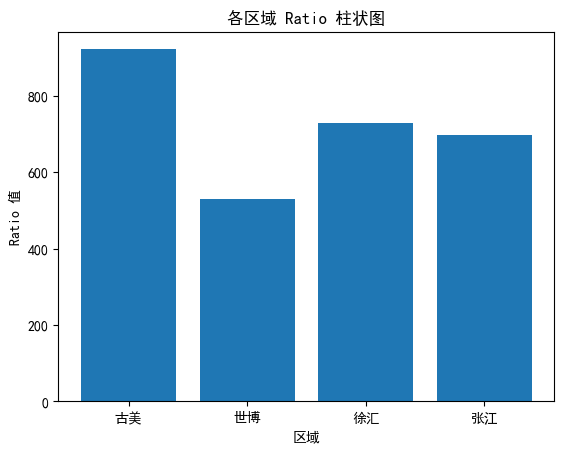

In [54]:
import matplotlib.pyplot as plt

# 区域名称
regions = ['古美', '世博', '徐汇', '张江']
ratios = [gumei_ratio, shibo_ratio, xuhui_ratio, zhangjiang_ratio]

# 指定支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 这里设置为黑体，也可换成其他支持中文的字体，如 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建柱状图
plt.bar(regions, ratios)

# 添加标题和坐标轴标签
plt.title('各区域 Ratio 柱状图')
plt.xlabel('区域')
plt.ylabel('Ratio 值')

# 显示图形
plt.show()

In [1]:
#作业二

In [8]:
#模型一的方程为price/m2i = β0m2i + β2locationi + ϵi
import pandas as pd
import statsmodels.api as sm

# 读取Excel数据
df1 = pd.read_excel("HW3_SEC.xlsx", sheet_name=0)

# 1. 处理区域虚拟变量（R列对应索引17）
# 定义区域到虚拟变量的映射：古美=0，世博=1，徐汇=2，张江=3
region_mapping = {"古美": 0, "世博": 1, "徐汇": 2, "张江": 3}

# 将R列区域数据转换为虚拟变量，存储在新列
df1['location_dummy'] = df1.iloc[:, 17].map(region_mapping)

# 2. 提取m2数据（G列对应索引6）
df1['m2'] = df1.iloc[:, 6]

# 3. 提取rent/m2数据（C列对应索引2）
df1['rent_per_m2'] = df1.iloc[:, 2]

# 4. 处理缺失值（删除包含缺失值的行）
df1_clean = df1.dropna(subset=['location_dummy', 'm2', 'rent_per_m2'])

# 5. 构建回归模型：rent_per_m2 = β0 + β1*m2 + β2*location_dummy + ε
# 添加常数项
X = sm.add_constant(df1_clean[['m2', 'location_dummy']])
# 因变量
y = df1_clean['rent_per_m2']

# 拟合OLS回归模型
model = sm.OLS(y, X)
results = model.fit()

# 6. 输出回归结果
print("回归系数：")
print(results.params)
print("\n完整回归统计结果：")
print(results.summary())

回归系数：
const             62395.161567
m2                   79.717170
location_dummy       77.278566
dtype: float64

完整回归统计结果：
                            OLS Regression Results                            
Dep. Variable:            rent_per_m2   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     110.2
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           2.66e-47
Time:                        09:10:10   Log-Likelihood:                -46409.
No. Observations:                4031   AIC:                         9.282e+04
Df Residuals:                    4028   BIC:                         9.284e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 读取数据
df1 = pd.read_excel("HW3_SEC.xlsx", sheet_name=0)

# 2. 数据预处理
## 2.1 提取所需列（根据实际列位置调整索引）
# R列：区域信息（索引17）
# G列：m2数据（索引6）
# C列：租金/平米数据（索引2）
df1 = df1.iloc[:, [17, 6, 2]].copy()  # 只保留需要的列
df1.columns = ['location', 'm2', 'rent_per_m2']  # 重命名列便于处理

## 2.2 转换区域为虚拟变量（古美=0，世博=1，徐汇=2，张江=3）
region_mapping = {"古美": 0, "世博": 1, "徐汇": 2, "张江": 3}
df1['location_dummy'] = df1['location'].map(region_mapping)

## 2.3 处理异常值和缺失值
# 去除缺失值
df1 = df1.dropna(subset=['location_dummy', 'm2', 'rent_per_m2'])

# 处理租金异常值（使用IQR方法）
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[(df[column] >= lower) & (df[column] <= upper)]

df_clean = remove_outliers(df1, 'rent_per_m2')
print(f"数据清洗后保留 {len(df_clean)} 条记录（原始 {len(df1)} 条）")

# 3. 构建回归模型
## 模型：rent_per_m2 = β0 + β1*m2 + β2*location_dummy + ε
X = sm.add_constant(df_clean[['m2', 'location_dummy']])  # 加入常数项
y = df_clean['rent_per_m2']

# 拟合模型
model = sm.OLS(y, X)
results = model.fit()

# 4. 输出回归结果
print("\n===== 租房价格回归结果 =====")
print(results.summary())


# 6. 提取并打印关键系数
print("\n===== 回归系数 =====")
print(f"常数项 (β0): {results.params['const']:.2f}")
print(f"面积系数 (β1): {results.params['m2']:.2f}")
print(f"区域系数 (β2): {results.params['location_dummy']:.2f}")


数据清洗后保留 4015 条记录（原始 4031 条）

===== 租房价格回归结果 =====
                            OLS Regression Results                            
Dep. Variable:            rent_per_m2   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     101.8
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           7.51e-44
Time:                        10:03:10   Log-Likelihood:                -46143.
No. Observations:                4015   AIC:                         9.229e+04
Df Residuals:                    4012   BIC:                         9.231e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

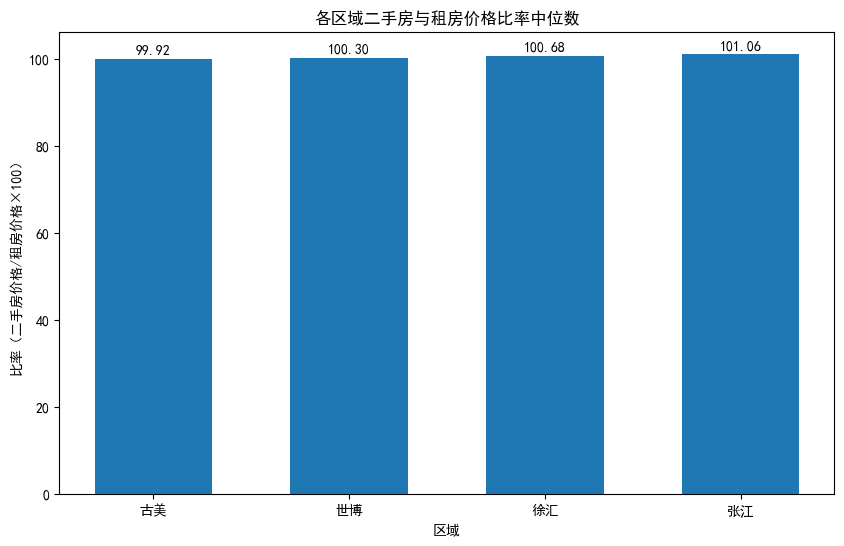

In [22]:
import numpy as np
import matplotlib.pyplot as plt
# 确保中文正常显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 二手房回归系数
sec_const = 62395.161567
sec_m2 = 79.717170
sec_location = 77.278566

# 租房回归系数
rent_const = 62935.98
rent_m2 = 75.84
rent_location = -195.12

# 生成模拟数据的数量
n_samples = 50000
# 区域列表
regions = ['古美', '世博', '徐汇', '张江']
# 区域虚拟变量值
region_dummies = [0, 1, 2, 3]

# 存储每个区域的比率结果
region_ratios = {region: [] for region in regions}

# 生成模拟数据并计算比率
for i, region in enumerate(regions):
    loc_dummy = region_dummies[i]
    # 生成m2数据（假设在合理范围内，如50到200）
    m2 = np.random.uniform(50, 200, n_samples)
    # 生成二手房价格
    sec_price = sec_const + sec_m2 * m2 + sec_location * loc_dummy
    # 生成租房价格
    rent_price = rent_const + rent_m2 * m2 + rent_location * loc_dummy
    # 计算比率（二手房价格 / 租房价格 * 100），并处理可能的除零情况
    ratio = np.where(rent_price != 0, (sec_price / rent_price) * 100, np.nan)
    ratio = ratio[~np.isnan(ratio)]  # 去除NaN值
    region_ratios[region] = ratio

# 计算每个区域比率的中位数
medians = {region: np.median(ratios) for region, ratios in region_ratios.items()}

# 绘制柱状图展示各区域比率中位数
plt.figure(figsize=(10, 6))
x = np.arange(len(regions))
plt.bar(x, medians.values(), width=0.6, align='center')
plt.xticks(x, regions)
plt.title('各区域二手房与租房价格比率中位数')
plt.xlabel('区域')
plt.ylabel('比率（二手房价格/租房价格×100）')
# 在柱子上标注中位数数值
for i, v in enumerate(medians.values()):
    plt.text(i, v + 1, f'{v:.2f}', ha='center')
plt.show()

In [ ]:
#作业三

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 读取数据
df1 = pd.read_excel("HW3_SEC.xlsx", sheet_name=0)

# 2. 数据预处理
## 2.1 提取所需列并命名
# R列: location数据（索引17）
# G列: m2数据（索引6）
# C列: price/m2数据（索引2）
df1 = df1.iloc[:, [17, 6, 2]].copy()
df1.columns = ['location', 'm2', 'price_per_m2']

## 2.2 转换区域为虚拟变量（古美=0，世博=1，徐汇=2，张江=3）
region_mapping = {"古美": 0, "世博": 1, "徐汇": 2, "张江": 3}
df1['location_dummy'] = df1['location'].map(region_mapping)

## 2.3 创建二次项和交互项
df1['m2_squared'] = df1['m2'] ** 2  # m2的平方项
df1['m2_location'] = df1['m2'] * df1['location_dummy']  # m2与区域的交互项

## 2.4 处理缺失值
df_clean = df1.dropna(subset=['location_dummy', 'm2', 'price_per_m2', 'm2_squared', 'm2_location'])
print(f"数据清洗后保留 {len(df_clean)} 条记录（原始 {len(df1)} 条）")

# 3. 构建回归模型
## 模型: price/m2 = alpha1 + alpha2*m2 + alpha3*(m2)^2 + alpha4*location + alpha5*m2*location + epsilon
X = df_clean[['m2', 'm2_squared', 'location_dummy', 'm2_location']]
X = sm.add_constant(X)  # 添加常数项（alpha1）
y = df_clean['price_per_m2']

# 拟合模型
model = sm.OLS(y, X)
results = model.fit()

# 4. 输出回归结果
print("\n===== 回归模型结果 =====")
print(results.summary())

# 5. 提取回归系数
print("\n===== 回归系数 =====")
print(f"alpha1 (常数项): {results.params['const']:.4f}")
print(f"alpha2 (m2系数): {results.params['m2']:.4f}")
print(f"alpha3 (m2平方项系数): {results.params['m2_squared']:.4f}")
print(f"alpha4 (区域系数): {results.params['location_dummy']:.4f}")
print(f"alpha5 (m2与区域交互项系数): {results.params['m2_location']:.4f}")

数据清洗后保留 4031 条记录（原始 4031 条）

===== 回归模型结果 =====
                            OLS Regression Results                            
Dep. Variable:           price_per_m2   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     198.7
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          1.03e-155
Time:                        10:15:30   Log-Likelihood:                -46153.
No. Observations:                4031   AIC:                         9.232e+04
Df Residuals:                    4026   BIC:                         9.235e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


# 1. 读取数据
df = pd.read_excel("HW3_RENT.xlsx", sheet_name=0)

# 2. 数据预处理
## 2.1 提取所需列并命名
# N列: location数据（索引13）
# I列: m2数据（索引8）
# R列: rent/m2数据（索引17）
df = df.iloc[:, [13, 8, 17]].copy()
df.columns = ['location', 'm2', 'rent_per_m2']

## 2.2 转换区域为虚拟变量（古美=0，世博=1，徐汇=2，张江=3）
region_mapping = {"古美": 0, "世博": 1, "徐汇": 2, "张江": 3}
df['location_dummy'] = df['location'].map(region_mapping)

## 2.3 创建二次项和交互项
df['m2_squared'] = df['m2'] **2  # m2的平方项
df['m2_location'] = df['m2'] * df['location_dummy']  # m2与区域的交互项

## 2.4 处理缺失值
df_clean = df.dropna(subset=['location_dummy', 'm2', 'rent_per_m2', 'm2_squared', 'm2_location'])
print(f"数据清洗后保留 {len(df_clean)} 条记录（原始 {len(df)} 条）")

# 3. 构建回归模型
## 模型: rent/m2 = alpha1 + alpha2*m2 + alpha3*(m2)^2 + alpha4*location + alpha5*m2*location + epsilon
# 注意：修正了原公式中alpha3重复的问题，将location项系数改为alpha4
X = df_clean[['m2', 'm2_squared', 'location_dummy', 'm2_location']]
X = sm.add_constant(X)  # 添加常数项（alpha1）
y = df_clean['rent_per_m2']

# 拟合模型
model = sm.OLS(y, X)
results = model.fit()

# 4. 输出回归结果
print("\n===== 回归模型结果 =====")
print(results.summary())

# 5. 提取回归系数
print("\n===== 回归系数 =====")
print(f"alpha1 (常数项): {results.params['const']:.4f}")
print(f"alpha2 (m2系数): {results.params['m2']:.4f}")
print(f"alpha3 (m2平方项系数): {results.params['m2_squared']:.4f}")
print(f"alpha4 (区域系数): {results.params['location_dummy']:.4f}")
print(f"alpha5 (m2与区域交互项系数): {results.params['m2_location']:.4f}")

数据清洗后保留 4182 条记录（原始 4182 条）

===== 回归模型结果 =====
                            OLS Regression Results                            
Dep. Variable:            rent_per_m2   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     25.26
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           1.05e-20
Time:                        10:19:01   Log-Likelihood:                -20621.
No. Observations:                4182   AIC:                         4.125e+04
Df Residuals:                    4177   BIC:                         4.128e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

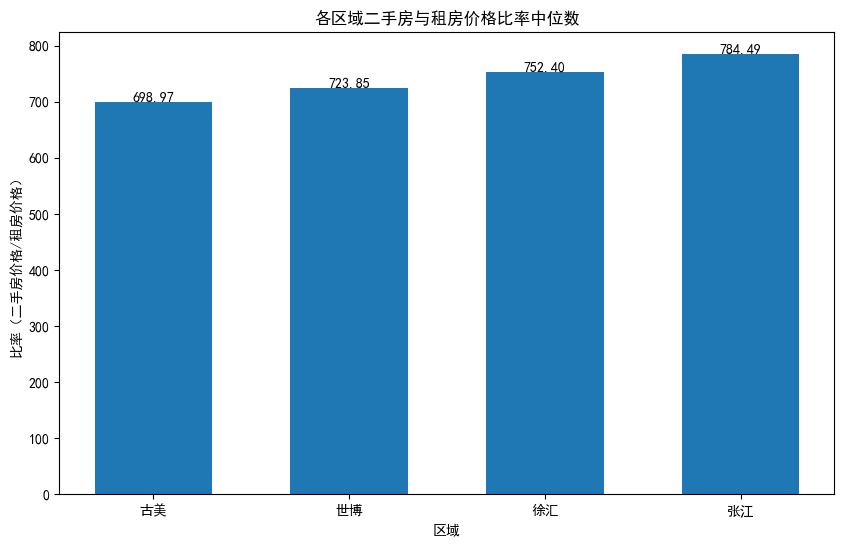

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# 确保中文正常显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 租房回归系数
rent_alpha1 = 91.5015
rent_alpha2 = 0.1747
rent_alpha3 = -0.0000
rent_alpha4 = 2.9530
rent_alpha5 = -0.0708

# 二手房回归系数
sec_alpha1 = 41804.2115
sec_alpha2 = 308.7780
sec_alpha3 = -0.0784
sec_alpha4 = 3362.8130
sec_alpha5 = -37.8851

# 生成模拟数据的数量
n_samples = 50000
# 区域列表
regions = ['古美', '世博', '徐汇', '张江']
# 区域虚拟变量值
region_dummies = [0, 1, 2, 3]

# 存储每个区域的比率结果
region_ratios = {region: [] for region in regions}

# 生成模拟数据并计算比率
for i, region in enumerate(regions):
    loc_dummy = region_dummies[i]
    # 生成m2数据（假设在合理范围内，如50到200）
    m2 = np.random.uniform(50, 200, n_samples)
    # 生成租房价格
    rent_price = rent_alpha1 + rent_alpha2 * m2 + rent_alpha3 * m2**2 + rent_alpha4 * loc_dummy + rent_alpha5 * m2 * loc_dummy
    # 生成二手房价格
    sec_price = sec_alpha1 + sec_alpha2 * m2 + sec_alpha3 * m2**2 + sec_alpha4 * loc_dummy + sec_alpha5 * m2 * loc_dummy
    # 计算比率（二手房价格 / 租房价格），并处理可能的除零情况
    ratio = np.where(rent_price != 0, sec_price / rent_price, np.nan)
    ratio = ratio[~np.isnan(ratio)]  # 去除NaN值
    region_ratios[region] = ratio

# 计算每个区域比率的中位数
medians = {region: np.median(ratios) for region, ratios in region_ratios.items()}

# 绘制柱状图展示各区域比率中位数
plt.figure(figsize=(10, 6))
x = np.arange(len(regions))
plt.bar(x, medians.values(), width=0.6, align='center')
plt.xticks(x, regions)
plt.title('各区域二手房与租房价格比率中位数')
plt.xlabel('区域')
plt.ylabel('比率（二手房价格/租房价格）')
# 在柱子上标注中位数数值
for i, v in enumerate(medians.values()):
    plt.text(i, v + 1, f'{v:.2f}', ha='center')
plt.show()